Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['1541.jpg', '22.jpg', '1560.jpg', '1709.jpg', '1741.jpg', '1438.jpg', '1595.jpg', '151.jpg', '1416.jpg', '1449.jpg', '1408.jpg', '1659.jpg', '1573.jpg', '1788.jpg', '1534.jpg', '1518.jpg', '1770.jpg', '1647.jpg', '1489.jpg', '1605.jpg', '1509.jpg', '1779.jpg', '1426.jpg', '196.jpg', '1794.jpg', '1403.jpg', '1774.jpg', '1633.jpg', '1563.jpg', '1568.jpg', '220.jpg', '1725.jpg', '189.jpg', '1505.jpg', '1510.jpg', '1650.jpg', '1557.jpg', '1431.jpg', '191.jpg', '1753.jpg', '20.jpg', '141.jpg', '1442.jpg', '1736.jpg', '1455.jpg', '1713.jpg', '1771.jpg', '1705.jpg', '1680.jpg', '176.jpg', '208.jpg', '1572.jpg', '1785.jpg', '1506.jpg', '1533.jpg', '1750.jpg', '162.jpg', '1575.jpg', '1569.jpg', '1738.jpg', '1551.jpg', '1432.jpg', '1712.jpg', '1500.jpg', '1574.jpg', '212.jpg', '1515.jpg', '1555.jpg', '148.jpg', '1439.jpg', '210.jpg', '163.jpg', '164.jpg', '1507.jpg', 

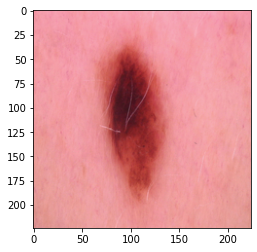

In [ ]:
import tensorflow as tf



from google.colab import drive
drive.mount('/content/drive')

tf.__version__

import os
train_yes = os.listdir("/content/drive/MyDrive/archive_2/train/benign")
train_no = os.listdir("/content/drive/MyDrive/archive_2/train/malignant")
print(train_yes)
print(train_no)

import random
import matplotlib.pyplot as plt
random_img = random.choice(train_yes)
random_img_dir = "/content/drive/MyDrive/archive_2/train/benign/"+ random_img
matrix = plt.imread(random_img_dir)
# print(matrix)
plt.imshow(matrix)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/archive_2/train"
test_dir = "/content/drive/MyDrive/archive_2/test"

img_size=(224,224)
BATCH = 32

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=img_size,
                                              batch_size = BATCH,
                                               class_mode = "categorical"
                                                       )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=img_size,
                                             batch_size=BATCH,
                                             class_mode="categorical")

from tensorflow.keras import layers

model = tf.keras.Sequential(
    [
     layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[224,224,3]),
     layers.MaxPool2D(pool_size=2, strides=2),
     layers.Conv2D(filters=32, kernel_size=5, activation='relu'),
     layers.MaxPool2D(pool_size=2, strides=2),
     layers.Dropout(0.2),
     layers.Conv2D(filters=32, kernel_size=5, activation='relu'),
     layers.MaxPool2D(pool_size=2, strides=2),
     layers.Flatten(),
     layers.Dense(32, activation='relu'),
     layers.Dropout(0.3),
     layers.Dense(64, activation='relu'),
     layers.Dense(2, activation='sigmoid')
    ]
)

# now we will compile our model
model.compile(loss = tf.keras.losses.categorical_crossentropy,
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

history = model.fit(train_data, validation_data=test_data, epochs=10)

model.summary()

def plot_loss_accuracy_curve(history):
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  loss = history.history['loss']
  plt.plot(acc, loss)
  plt.figure()
  plt.plot(val_acc, val_loss)
  plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ac

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/archive_2/train'
test_path = '/content/drive/MyDrive/archive_2/test'


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3] , weights= 'imagenet', include_top= False )


In [ ]:
for layer in vgg.layers:
  layer.trainable= False

In [ ]:
folders = glob('/content/drive/MyDrive/archive_2/train/*')

In [ ]:
x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='sigmoid')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs= prediction)


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2 , zoom_range=0.2, horizontal_flip= True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/archive_2/train' , target_size= (224, 224), batch_size=32, class_mode='categorical')

Found 2637 images belonging to 2 classes.


In [ ]:
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/archive_2/test' , target_size= (224, 224), batch_size=32, class_mode='categorical'  )

Found 660 images belonging to 2 classes.


In [ ]:
'''r = model.fit_generator(training_set, samples_per_epoch = 8000, nb_epoch = 10, validation_data = test_set, nb_val_samples = 2000)'''

'r = model.fit_generator(training_set, samples_per_epoch = 8000, nb_epoch = 10, validation_data = test_set, nb_val_samples = 2000)'

In [ ]:
r= model.fit_generator(training_set, validation_data=testing_set, epochs=10, steps_per_epoch=len(training_set), validation_steps=len(testing_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
83/83 [==============================] - 53s 619ms/step - loss: 0.5112 - accuracy: 0.7600 - val_loss: 0.3571 - val_accuracy: 0.8439
Epoch 2/10
83/83 [==============================] - 51s 615ms/step - loss: 0.3755 - accuracy: 0.8275 - val_loss: 0.3696 - val_accuracy: 0.8409
Epoch 3/10
83/83 [==============================] - 51s 616ms/step - loss: 0.3592 - accuracy: 0.8385 - val_loss: 0.3416 - val_accuracy: 0.8591
Epoch 4/10
83/83 [==============================] - 51s 616ms/step - loss: 0.3177 - accuracy: 0.8608 - val_loss: 0.3963 - val_accuracy: 0.8424
Epoch 5/10
83/83 [==============================] - 51s 615ms/step - loss: 0.3150 - accuracy: 0.8669 - val_loss: 0.3568 - val_accuracy: 0.8424
Epoch 6/10
83/83 [==============================] - 51s 616ms/step - loss: 0.2939 - accuracy: 0.8631 - val_loss: 0.3712 - val_accuracy: 0.8212
Epoch 7/10
83/83 [==============================] - 51s 614ms/step - loss: 0.2722 - accuracy: 0.8824 - val_loss: 0.3447 - val_accuracy: 0.8576

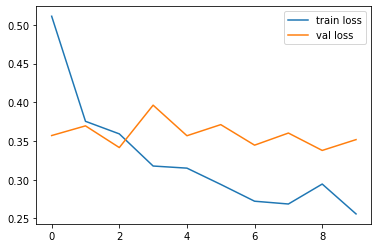

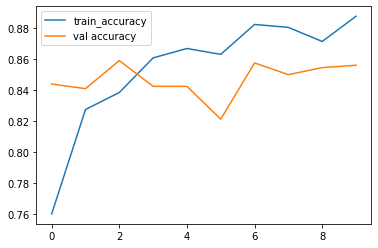

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show(
)
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('skinfeatures_new_model.h5')
